In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, '9')

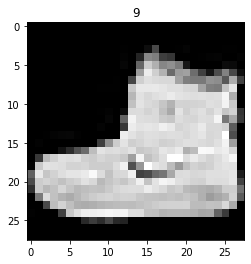

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

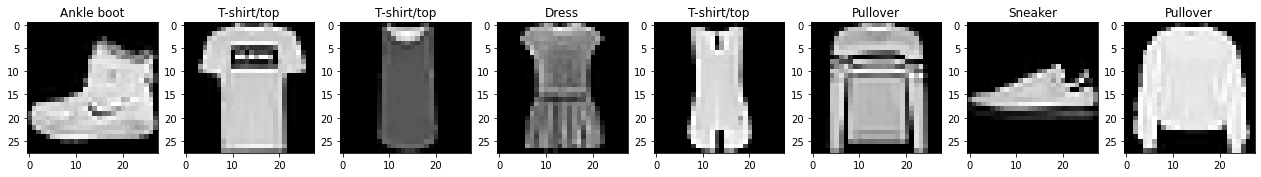

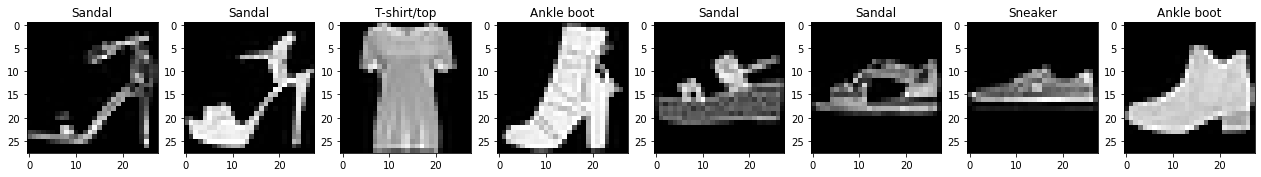

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def preprocess_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

train_images, train_labels = preprocess_data(train_images, train_labels)
test_images, test_labels = preprocess_data(test_images, test_labels)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
INPUT_SIZE = 28

In [18]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
  Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
  Dense(100, activation='relu'),
  Dense(30, activation='relu'),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


2022-09-14 10:31:04.568793: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

train_oh_labels.shape, test_oh_labels.shape

((60000, 10), (10000, 10))

In [21]:
train_oh_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

2022-09-14 10:59:42.254356: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6530 - accuracy: 0.7699
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3868 - accuracy: 0.8596
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3419 - accuracy: 0.8753
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3183 - accuracy: 0.8822
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3010 - accuracy: 0.8889
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2868 - accuracy: 0.8953
Epoch 7/20
1875/1875 [==============================] - 2s 960us/step - loss: 0.2788 - accuracy: 0.8953
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2596 - accuracy: 0.9022
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2596 - accuracy: 0.9017
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [25]:
history.history['loss']

[0.5076472163200378,
 0.3784371614456177,
 0.34206661581993103,
 0.3189852833747864,
 0.30196255445480347,
 0.28524452447891235,
 0.27678391337394714,
 0.2641028165817261,
 0.2568590044975281,
 0.24795803427696228,
 0.24105407297611237,
 0.23448911309242249,
 0.2283284068107605,
 0.22240521013736725,
 0.21825683116912842,
 0.2112966924905777,
 0.20469313859939575,
 0.19985195994377136,
 0.19571609795093536,
 0.19314183294773102]

In [26]:
history.history['accuracy']

[0.8200666904449463,
 0.8620499968528748,
 0.875166654586792,
 0.8824333548545837,
 0.8873166441917419,
 0.8951333165168762,
 0.8966000080108643,
 0.901116669178009,
 0.9035500288009644,
 0.9072999954223633,
 0.9101333618164062,
 0.9119499921798706,
 0.9142500162124634,
 0.9173166751861572,
 0.9176666736602783,
 0.9210333228111267,
 0.9228166937828064,
 0.9255333542823792,
 0.9266166687011719,
 0.9266999959945679]

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
pred_proba = model.predict(test_images)

pred_proba.shape

(10000, 10)

In [29]:
pred_proba[:5]

array([[8.8278364e-07, 9.8993638e-08, 4.3677983e-06, 2.7956011e-08,
        1.0652577e-08, 4.8424777e-06, 8.5060701e-06, 1.1271046e-03,
        2.6710609e-10, 9.9885416e-01],
       [5.2019604e-06, 2.0592953e-11, 9.9965990e-01, 1.2391473e-15,
        2.4794540e-04, 7.3865767e-21, 8.6957123e-05, 1.9906938e-23,
        3.3310764e-16, 1.7765298e-20],
       [6.6626898e-21, 1.0000000e+00, 8.7490696e-26, 5.0194759e-18,
        1.9698224e-24, 2.3228131e-34, 4.9806964e-19, 1.4485263e-33,
        5.2256072e-32, 1.4066152e-23],
       [2.3155393e-13, 1.0000000e+00, 5.5345130e-20, 6.3687812e-11,
        4.2872435e-20, 5.9522298e-26, 7.3810309e-14, 5.4189028e-27,
        5.8198586e-23, 9.0134759e-19],
       [3.4649846e-01, 6.5580780e-10, 5.1574861e-03, 8.9835713e-04,
        2.4179010e-04, 1.6016386e-11, 6.4720190e-01, 5.7524509e-11,
        2.0667128e-06, 1.3366108e-09]], dtype=float32)

In [30]:
test_images[0].shape

(28, 28)

In [34]:
np.expand_dims(test_images[0], axis=0).shape, np.expand_dims(test_images[0], axis=1).shape \
,np.expand_dims(test_images[0], axis=-1).shape 

((1, 28, 28), (28, 1, 28), (28, 28, 1))

In [38]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))

pred_proba

array([[8.8278449e-07, 9.8993638e-08, 4.3678065e-06, 2.7956011e-08,
        1.0652577e-08, 4.8424822e-06, 8.5060865e-06, 1.1271040e-03,
        2.6710609e-10, 9.9885416e-01]], dtype=float32)

In [41]:
pred = np.argmax(np.squeeze(pred_proba))

pred

9

In [44]:
test_labels[0] == pred

True

In [47]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8889


[0.35221707820892334, 0.8888999819755554]

In [48]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, train_labels = preprocess_data(train_images, train_labels)
test_images, test_labels = preprocess_data(test_images, test_labels)

In [51]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, \
  test_size=0.15, random_state=2022)

tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape

((51000, 28, 28), (51000,), (9000, 28, 28), (9000,))

In [52]:
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

tr_oh_labels.shape, val_oh_labels.shape

((51000, 10), (9000, 10))

In [53]:
model = Sequential([
  Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
  Dense(100, activation='relu'),
  Dense(30, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, \
                    validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
1594/1594 [==============================] - 3s 1ms/step - loss: 0.6923 - accuracy: 0.7656 - val_loss: 0.4550 - val_accuracy: 0.8364
Epoch 2/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.4068 - accuracy: 0.8544 - val_loss: 0.3946 - val_accuracy: 0.8543
Epoch 3/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3627 - accuracy: 0.8666 - val_loss: 0.4076 - val_accuracy: 0.8493
Epoch 4/20
1594/1594 [==============================] - 2s 2ms/step - loss: 0.3280 - accuracy: 0.8779 - val_loss: 0.3535 - val_accuracy: 0.8729
Epoch 5/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3066 - accuracy: 0.8866 - val_loss: 0.3278 - val_accuracy: 0.8802
Epoch 6/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8873 - val_loss: 0.3123 - val_accuracy: 0.8898
Epoch 7/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2782 - accuracy: 0.8963 - val_loss: 0.3290 - val_accuracy:

In [55]:
history.history['loss']

[0.5277537703514099,
 0.39443570375442505,
 0.3548792600631714,
 0.32855042815208435,
 0.31119289994239807,
 0.29588446021080017,
 0.2833231985569,
 0.2724568843841553,
 0.2612306773662567,
 0.2536659240722656,
 0.24540720880031586,
 0.2380208969116211,
 0.2319682091474533,
 0.22446927428245544,
 0.2181742638349533,
 0.21150007843971252,
 0.2064882069826126,
 0.2012774646282196,
 0.1970358043909073,
 0.18967987596988678]

In [56]:
history.history['accuracy']

[0.8169804215431213,
 0.8590196371078491,
 0.8702548742294312,
 0.8797059059143066,
 0.8852941393852234,
 0.8903921842575073,
 0.8951568603515625,
 0.8977450728416443,
 0.9028431177139282,
 0.9045490026473999,
 0.90790194272995,
 0.91019606590271,
 0.9125294089317322,
 0.9154706001281738,
 0.9177843332290649,
 0.9196470379829407,
 0.9217255115509033,
 0.9243725538253784,
 0.9257842898368835,
 0.9281960725784302]

In [57]:
history.history['val_loss']

[0.45498764514923096,
 0.3946465253829956,
 0.407561331987381,
 0.3534605801105499,
 0.3278220295906067,
 0.3123241364955902,
 0.32899630069732666,
 0.31380876898765564,
 0.32651999592781067,
 0.34989649057388306,
 0.3246440291404724,
 0.3492313027381897,
 0.3174456059932709,
 0.31638455390930176,
 0.3167949318885803,
 0.3388758599758148,
 0.32191234827041626,
 0.319663405418396,
 0.3241802453994751,
 0.3409152328968048]

In [58]:
history.history['val_accuracy']

[0.8364444375038147,
 0.8543333411216736,
 0.8493333458900452,
 0.8728888630867004,
 0.8802222013473511,
 0.8897777795791626,
 0.8823333382606506,
 0.8897777795791626,
 0.882111132144928,
 0.878000020980835,
 0.8857777714729309,
 0.8756666779518127,
 0.8895555734634399,
 0.8927778005599976,
 0.8931111097335815,
 0.890333354473114,
 0.8963333368301392,
 0.8972222208976746,
 0.8963333368301392,
 0.8892222046852112]

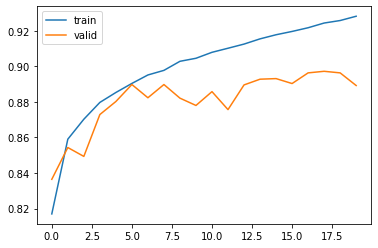

In [59]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

In [60]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [61]:
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
  def __init__(self, units=32):
    super(CustomDense, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(
      shape=(input_shape[-1], self.units),
      initializer='random_normal',
      trainable=True
    )
    self.b = self.add_weight(
      shape=(self.units,), initializer='random_normal',
      trainable=True
    )

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

inputs = Input((4,))
ouputs = CustomDense(10)(inputs)

model = Model(inputs, ouputs)

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
custom_dense (CustomDense)   (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [63]:
INPUT_SIZE = 28

def create_model():
  input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
  x = Flatten()(input_tensor)
  x = Dense(units=100, activation='relu')(x)
  x = Dense(units=30, activation='relu')(x)
  output = Dense(units=10, activation='softmax')(x)
  model = Model(inputs=input_tensor, outputs=output)

  return model

In [64]:
model = create_model()

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [71]:
def get_preprocessed_data(images, labels):
  images = np.array(images / 255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

def get_preprocessed_ohe(images, labels):
  images, labels = get_preprocessed_data(images, labels)
  oh_labels = to_categorical(labels)

  return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, \
                              valid_size=0.15, random_state=2022):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    tr_images, val_images, tr_oh_labels,val_oh_labels = \
      train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

In [68]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [72]:
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
  get_train_valid_test_set(train_images, train_labels, test_images, test_labels)

tr_images.shape, tr_oh_labels.shape, val_images.shape, \
  val_oh_labels.shape, test_images.shape, test_oh_labels.shape

((51000, 28, 28),
 (51000, 10),
 (9000, 28, 28),
 (9000, 10),
 (10000, 28, 28),
 (10000, 10))

In [73]:
model = create_model()

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=20, \
  validation_data=(val_images, val_oh_labels))

Epoch 1/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.8943 - val_loss: 0.3156 - val_accuracy: 0.8872
Epoch 2/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2724 - accuracy: 0.8986 - val_loss: 0.3403 - val_accuracy: 0.8758
Epoch 3/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2612 - accuracy: 0.9021 - val_loss: 0.3166 - val_accuracy: 0.8870
Epoch 4/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2518 - accuracy: 0.9066 - val_loss: 0.3177 - val_accuracy: 0.8878
Epoch 5/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2448 - accuracy: 0.9073 - val_loss: 0.3191 - val_accuracy: 0.8897
Epoch 6/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2372 - accuracy: 0.9113 - val_loss: 0.3334 - val_accuracy: 0.8837
Epoch 7/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2316 - accuracy: 0.9124 - val_loss: 0.3301 - val_accuracy:

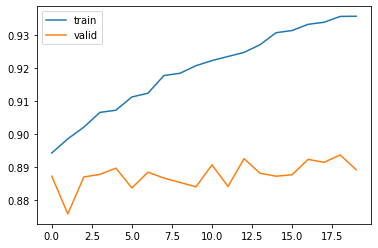

In [78]:
def show_history(history):
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.legend()

show_history(history)

In [80]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8821


[0.413634717464447, 0.882099986076355]

In [81]:
!pwd

/Users/f2hard3/Workspace/deep-learning-cnn/develop


In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                        save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels), callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 1s 2ms/step - loss: 0.8812 - accuracy: 0.6994 - val_loss: 0.4535 - val_accuracy: 0.8409

Epoch 00001: val_loss improved from inf to 0.45347, saving model to /Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.01-0.45.hdf5
Epoch 2/10
399/399 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.8494 - val_loss: 0.3911 - val_accuracy: 0.8634

Epoch 00002: val_loss improved from 0.45347 to 0.39113, saving model to /Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.02-0.39.hdf5
Epoch 3/10
399/399 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8656 - val_loss: 0.3871 - val_accuracy: 0.8593

Epoch 00003: val_loss improved from 0.39113 to 0.38710, saving model to /Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.03-0.39.hdf5
Epoch 4/10
399/399 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8719 - val_loss: 0.3820 - val_accuracy: 0.8618



In [89]:
!ls -la

total 11648
drwxr-xr-x  14 f2hard3  staff      448 Sep 14 17:30 .
drwx------@  6 f2hard3  staff      192 Sep  8 10:48 ..
-rw-r--r--   1 f2hard3  staff   161562 Sep 14 17:30 fashion_minist.ipynb
-rw-r--r--   1 f2hard3  staff  2357050 Sep 14 09:34 gradient_descent.ipynb
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.01-0.45.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.02-0.39.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.03-0.39.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.04-0.38.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.05-0.36.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.06-0.36.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.07-0.34.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:29 weights.08-0.34.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:30 weights.09-0.33.hdf5
-rw-r--r--   1 f2hard3  staff   343232 Sep 14 17:30 weights.10-0.33.hdf5


In [97]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.33, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels), callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 1s 2ms/step - loss: 0.8701 - accuracy: 0.6999 - val_loss: 0.4651 - val_accuracy: 0.8373
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8547 - val_loss: 0.4038 - val_accuracy: 0.8548
Epoch 3/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8634 - val_loss: 0.3757 - val_accuracy: 0.8632
Epoch 4/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8745 - val_loss: 0.3668 - val_accuracy: 0.8674
Epoch 5/30
399/399 [==============================] - 1s 1ms/step - loss: 0.3397 - accuracy: 0.8759 - val_loss: 0.3473 - val_accuracy: 0.8726
Epoch 6/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.8855 - val_loss: 0.3601 - val_accuracy: 0.8718
Epoch 7/30
399/399 [==============================] - 1s 1ms/step - loss: 0.3005 - accuracy: 0.8899 - val_loss: 0.3361 - val_accuracy: 0.8790
Epoch 

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

es_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels), callbacks=[es_cb])

Epoch 1/30
399/399 [==============================] - 2s 3ms/step - loss: 0.8912 - accuracy: 0.6985 - val_loss: 0.4770 - val_accuracy: 0.8279
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8517 - val_loss: 0.4026 - val_accuracy: 0.8567
Epoch 3/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8638 - val_loss: 0.3790 - val_accuracy: 0.8639
Epoch 4/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8728 - val_loss: 0.3679 - val_accuracy: 0.8660
Epoch 5/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8797 - val_loss: 0.3457 - val_accuracy: 0.8724
Epoch 6/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.8822 - val_loss: 0.3397 - val_accuracy: 0.8777
Epoch 7/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8895 - val_loss: 0.3249 - val_accuracy: 0.8852
Epoch 

In [103]:
mcp_cb = ModelCheckpoint(filepath='/Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                        save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=1)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.33, patience=5, mode='min', verbose=1)
es_cb = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels), callbacks=[mcp_cb, rlr_cb, es_cb])

Epoch 1/40
399/399 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9611 - val_loss: 0.3303 - val_accuracy: 0.8990

Epoch 00001: val_loss improved from inf to 0.33030, saving model to /Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.01-0.33.hdf5
Epoch 2/40
399/399 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9612 - val_loss: 0.3301 - val_accuracy: 0.8982

Epoch 00002: val_loss improved from 0.33030 to 0.33008, saving model to /Users/f2hard3/Workspace/deep-learning-cnn/develop/weights.02-0.33.hdf5
Epoch 3/40
399/399 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9615 - val_loss: 0.3309 - val_accuracy: 0.8981

Epoch 00003: val_loss did not improve from 0.33008
Epoch 4/40
399/399 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9617 - val_loss: 0.3302 - val_accuracy: 0.8983

Epoch 00004: val_loss did not improve from 0.33008
Epoch 5/40
399/399 [======================